In [1]:
import matplotlib.pyplot as plt
from src.data_generator import NormalGenerator, UniformGenerator
from src.perceptron import Perceptron
import numpy as np
import matplotlib

In [5]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [10]:
ax, fig = plt.subplots(figsize=(4, 4))

generator = NormalGenerator(2)
X, Y = generator.generate(500, 0)

neg_idx = Y == -1
pos_idx = ~neg_idx

fig.scatter(X[neg_idx, 0], X[neg_idx, 1], label="-1", s=2)
fig.scatter(X[pos_idx, 0], X[pos_idx, 1], color="red", label="+1", s=2)
fig.set_xticks(range(-4, 5, 2))
fig.set_yticks(range(-4, 5, 2))
fig.set_xlabel("Dimension 1")
fig.set_ylabel("Dimension 2")
fig.legend(title="Label")

plt.savefig("./pictures/data-generation-1.pgf")

In [11]:
ax, fig = plt.subplots(figsize=(4, 4))

generator = NormalGenerator(2)
values, _ = generator.generate(500, 0)
values2, _ = generator.generate(500, 2)

fig.scatter(values[:, 0], values[:, 1], label="mean = 0", s=2)
fig.scatter(values2[:, 0], values2[:, 1], color="red", label="mean = 2", s=2)
fig.set_xticks(range(-4, 7, 2))
fig.set_yticks(range(-4, 7, 2))
fig.set_xlabel("Dimension 1")
fig.set_ylabel("Dimension 2")
fig.legend()

plt.savefig("pictures/data-generation-2.pgf")


Doing generator NormalGenerator
Doing generator UniformGenerator


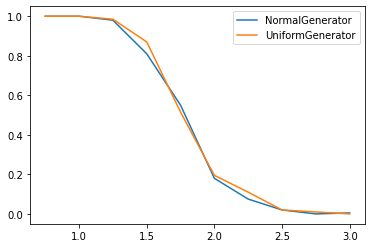

In [7]:
N = 20
nd = 200
nmax = 100
alpha = 0.75
P = int(alpha * N)
alpha_range = np.arange(0.75, 3.01, 0.25)

normal = NormalGenerator(N)
uniform = UniformGenerator(N)

plt.close()

for generator in normal, uniform:
    print(f"Doing generator {generator.__class__.__name__}")
    success_rate = []
    for alpha in alpha_range:
        P = int(alpha * N)
        success = 0.0
        for _ in range(nd):
            perceptron = Perceptron(N)
            X, Y = generator.generate(P)
            if perceptron.train(X, Y, nmax):
                success += 1.0
        success_rate.append(success / nd)
    
    plt.plot(alpha_range, success_rate, label=generator.__class__.__name__)

plt.legend()

Doing nmax_range UniformGenerator
Doing nmax_range UniformGenerator


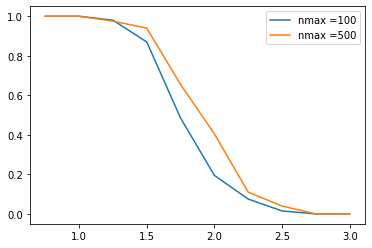

In [8]:
N = 20
nd = 200
alpha = 0.75
P = int(alpha * N)
alpha_range = np.arange(0.75, 3.01, 0.25)

normal = NormalGenerator(N)
uniform = UniformGenerator(N)

plt.close()

nmax_range = [100, 500]

for nmax in nmax_range:
    print(f"Doing nmax_range {generator.__class__.__name__}")
    success_rate = []
    for alpha in alpha_range:
        P = int(alpha * N)
        success = 0.0
        for _ in range(nd):
            perceptron = Perceptron(N)
            X, Y = generator.generate(P)
            if perceptron.train(X, Y, nmax):
                success += 1.0
        success_rate.append(success / nd)
    
    plt.plot(alpha_range, success_rate, label=f"{nmax =}")

plt.legend()